 ### Import Packages

In [19]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
pandas.options.display.mpl_style = 'default'


### Import Data

In [2]:
institution_data= pandas.read_csv('/home/shubhamjain/devel/contifydeploy/contify-banking/notebooks/data-challenge-data-master/2012_to_2014_institutions_data.csv')
loans_data= pandas.read_csv('/home/shubhamjain/devel/contifydeploy/contify-banking/notebooks/data-challenge-data-master/2012_to_2014_loans_data.csv')

/home/shubhamjain/.pyenv/versions/banking/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,7,8,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Institution Data

In [3]:
institution_data.head()


,As_of_Year,Respondent_ID,Agency_Code,Respondent_Name_TS,Respondent_City_TS,Respondent_State_TS,Respondent_ZIP_Code,Parent_Name_TS,Parent_City_TS,Parent_State_TS,Parent_ZIP_Code,Assets_000_Panel
0,2012,0000000047,1,FIRST FINANCIAL BANK NA,TERRE HAUTE,IN,47802,FIRST FINANCIAL CORPORATION,TERRE HAUTE,IN,47807,2854392
1,2012,0000000056,1,"FIRST FINANCIAL BANK, N.A.",CINCINNATI,OH,45202,NaN,NaN,NaN,NaN,6663427
2,2012,0000000086,1,FIRST NATIONAL BANK OF GERMANT,GERMANTOWN,OH,45327-1349,NaN,NaN,NaN,NaN,52094
3,2012,0000000182,1,EXCHANGE NATIONAL BANK & TRUST,ATCHISON,KS,66002,NaN,NaN,NaN,NaN,330487
4,2012,0000000324,1,FIRST NATIONAL BANK AND TRUST,NEWTOWN,PA,18940,NaN,NaN,NaN,NaN,785017


In [4]:
institution_data.describe()


,As_of_Year,Agency_Code,Assets_000_Panel
count,21655.000000,21655.000000,2.165500e+04
mean,2012.984392,3.785592,4.976024e+06
std,0.817139,1.944049,6.140364e+07
min,2012.000000,1.000000,0.000000e+00
25%,2012.000000,3.000000,8.380000e+04
50%,2013.000000,3.000000,1.941060e+05
75%,2014.000000,5.000000,4.908065e+05
max,2014.000000,9.000000,1.945467e+09


#### Loans Data

In [5]:
loans_data.head()


,Agency_Code,Applicant_Income_000,As_of_Year,Census_Tract_Number,County_Code,FFIEC_Median_Family_Income,Loan_Amount_000,MSA_MD,Number_of_Owner_Occupied_Units,Respondent_ID,...,Loan_Purpose_Description,Agency_Code_Description,Lien_Status_Description,Loan_Type_Description,State,County_Name,Conforming_Limit_000,Conventional_Status,Conforming_Status,Conventional_Conforming_Flag
0,3,0084,2012,0207.00,079,00054900,94,16620,00001545,0000000384,...,Refinance,FDIC,First Lien,Conventional,WV,PUTNAM,417,Conventional,Conforming,Y
1,3,0084,2012,9556.00,043,00054900,133,16620,00001548,0000000384,...,Refinance,FDIC,First Lien,Conventional,WV,LINCOLN,417,Conventional,Conforming,Y
2,3,0053,2012,9556.00,043,00054900,70,16620,00001548,0000000384,...,Refinance,FDIC,First Lien,Conventional,WV,LINCOLN,417,Conventional,Conforming,Y
3,3,0085,2012,0206.01,079,00054900,102,16620,00001935,0000000384,...,Refinance,FDIC,First Lien,Conventional,WV,PUTNAM,417,Conventional,Conforming,Y
4,3,0038,2012,0107.01,039,00054900,112,16620,00001492,0000000384,...,Purchase,FDIC,First Lien,Conventional,WV,KANAWHA,417,Conventional,Conforming,Y


In [6]:
loans_data.describe()

,Agency_Code,As_of_Year,Loan_Amount_000,Sequence_Number,State_Code,Conforming_Limit_000
count,1321158.000000,1321158.000000,1321158.000000,1321158.000000,1321158.000000,1320321.000000
mean,6.852763,2012.797469,290.233111,162353.932230,38.513506,532.910087
std,2.486604,0.775239,965.779154,334661.258178,15.257442,86.907939
min,1.000000,2012.000000,1.000000,0.000000,10.000000,417.000000
25%,7.000000,2012.000000,153.000000,2322.000000,24.000000,458.000000
50%,7.000000,2013.000000,235.000000,16128.000000,51.000000,535.000000
75%,9.000000,2013.000000,347.000000,140628.000000,51.000000,625.000000
max,9.000000,2014.000000,99625.000000,3076577.000000,54.000000,625.000000


In [22]:
loans_data[['State_Code', 'Loan_Amount_000']].head()

,State_Code,Loan_Amount_000
0,54,94
1,54,133
2,54,70
3,54,102
4,54,112


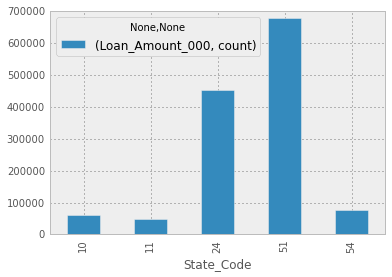

In [50]:
statewize = loans_data[['State_Code', 'Loan_Amount_000']]
statewize_grouped = statewize.groupby('State_Code').agg(['count'])
statewize_grouped.plot(kind='bar')


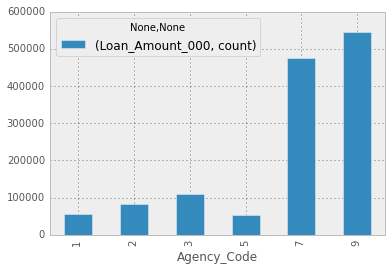

In [51]:
agencywize = loans_data[['Agency_Code', 'Loan_Amount_000']]
agencywize_grouped = agencywize.groupby('Agency_Code').agg(['count'])
agencywize_grouped.plot(kind='bar')


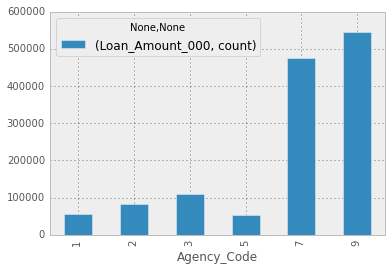